In [1]:
import nltk
from datasets import load_from_disk
from transformers import AutoTokenizer
from collections import Counter
import numpy as np
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
import utils
from training.DataPreprocessing import convert_dataset
import main

### Dataset Loading

In [2]:
sw_dataset_name = main.SW_NAME
ose_dataset_name = main.OSE_NAME
sw_dataset = convert_dataset(load_from_disk(main.SW_SAVE_PATH), purpose="eval")
ose_dataset = convert_dataset(load_from_disk(main.OSE_SAVE_PATH), purpose="eval")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

### Inspection of samples with specific metric value

In [3]:
print("------------- Simple Wikipedia -----------------------------------------------------------")
num_printed_samples = 0
for example in tqdm(sw_dataset):
    if num_printed_samples == 10:
        break
    if example["ttr_words"] == 1:
        word_list = nltk.word_tokenize(example["text"])
        print(f"Sample {num_printed_samples+1}: ", example["text"])
        print("word tokens (nltk): ", word_list)
        print("tokens (bert): ", tokenizer.convert_ids_to_tokens(example["input_ids"]))
        print("----------------------------------------------------------------------------------------")
        num_printed_samples += 1

------------- Simple Wikipedia -----------------------------------------------------------


  0%|          | 24/373662 [00:00<04:06, 1517.61it/s]

Sample 1:  It is frequently a better option to do one or more of the following :
word tokens (nltk):  ['It', 'is', 'frequently', 'a', 'better', 'option', 'to', 'do', 'one', 'or', 'more', 'of', 'the', 'following', ':']
tokens (bert):  ['[CLS]', 'it', 'is', 'frequently', 'a', 'better', 'option', 'to', 'do', 'one', 'or', 'more', 'of', 'the', 'following', ':', '[SEP]']
----------------------------------------------------------------------------------------
Sample 2:  Lord Do n't Slow Me Down is a rockumentary film .
word tokens (nltk):  ['Lord', 'Do', "n't", 'Slow', 'Me', 'Down', 'is', 'a', 'rockumentary', 'film', '.']
tokens (bert):  ['[CLS]', 'lord', 'do', 'n', "'", 't', 'slow', 'me', 'down', 'is', 'a', 'rock', '##umen', '##tary', 'film', '.', '[SEP]']
----------------------------------------------------------------------------------------
Sample 3:  It looks back on British band Oasis ' Do n't Believe the Truth world tour .
word tokens (nltk):  ['It', 'looks', 'back', 'on', 'British', '

In [4]:
print("------------- OneStopEnglish -----------------------------------------------------------")
num_printed_samples = 0
for example in tqdm(ose_dataset):
    if num_printed_samples == 10:
        break
    if example["ttr_words"] == 1:
        word_list = nltk.word_tokenize(example["text"])
        print(f"Sample {num_printed_samples+1}: ", example["text"])
        print("word tokens (nltk): ", word_list)
        print("tokens (bert): ", tokenizer.convert_ids_to_tokens(example["input_ids"]))
        print("----------------------------------------------------------------------------------------")
        num_printed_samples += 1

------------- OneStopEnglish -----------------------------------------------------------


  0%|          | 29/18730 [00:00<00:03, 5744.27it/s]

Sample 1:  He says they should now accept it will probably not happen.
word tokens (nltk):  ['He', 'says', 'they', 'should', 'now', 'accept', 'it', 'will', 'probably', 'not', 'happen', '.']
tokens (bert):  ['[CLS]', 'he', 'says', 'they', 'should', 'now', 'accept', 'it', 'will', 'probably', 'not', 'happen', '.', '[SEP]']
----------------------------------------------------------------------------------------
Sample 2:  The astronauts will not return to Earth.
word tokens (nltk):  ['The', 'astronauts', 'will', 'not', 'return', 'to', 'Earth', '.']
tokens (bert):  ['[CLS]', 'the', 'astronauts', 'will', 'not', 'return', 'to', 'earth', '.', '[SEP]']
----------------------------------------------------------------------------------------
Sample 3:  Gerard ’t Hooft is a Dutch Nobel laureate in physics.
word tokens (nltk):  ['Gerard', '’', 't', 'Hooft', 'is', 'a', 'Dutch', 'Nobel', 'laureate', 'in', 'physics', '.']
tokens (bert):  ['[CLS]', 'gerard', '’', 't', 'ho', '##oft', 'is', 'a', 'dutch',

Note: The same word lower and uppercase are being considered different words.

In [5]:
print("------------- Simple Wikipedia -----------------------------------------------------------")
num_printed_samples = 0
for example in tqdm(sw_dataset):
    if num_printed_samples == 10:
        break
    if example["sentence_length_words"] > 50:
        word_list = nltk.word_tokenize(example["text"])
        print(f"Sample {num_printed_samples+1}: ", example["text"])
        # print("word tokens (nltk): ", word_list)
        # print("tokens (bert): ", tokenizer.convert_ids_to_tokens(example["input_ids"]))
        print("----------------------------------------------------------------------------------------")
        num_printed_samples += 1

------------- Simple Wikipedia -----------------------------------------------------------


  0%|          | 0/373662 [00:00<?, ?it/s]

Sample 1:  The waiting period was waived for ten players deemed exceptionally notable : Dit Clapper -LRB- 1947 -RRB- , Maurice Richard -LRB- 1961 -RRB- , Ted Lindsay -LRB- 1966 -RRB- , Red Kelly -LRB- 1969 -RRB- , Terry Sawchuk -LRB- 1971 -RRB- , Jean Beliveau -LRB- 1972 -RRB- , Gordie Howe -LRB- 1972 -RRB- , Bobby Orr -LRB- 1979 -RRB- , Mario Lemieux -LRB- 1997 -RRB- and Wayne Gretzky -LRB- 1999 -RRB- .
----------------------------------------------------------------------------------------
Sample 2:  The prancing horse was the symbol on Italian World War I ace Francesco Baracca 's fighter plane , and became the logo of Ferrari after the fallen ace 's parents , good friends with Enzo Ferrari , asked him so , to continue his tradition of sportsmanship , gallantry and boldness .
----------------------------------------------------------------------------------------
Sample 3:  For that reason the normal standard is 61.5 m. Modern pool tables range in size from 3.5 f by 7 f , to 4.5 f by

  0%|          | 1206/373662 [00:00<00:28, 13249.51it/s]


In [6]:
print("------------- OneStopEnglish -----------------------------------------------------------")
num_printed_samples = 0
for example in tqdm(ose_dataset):
    if num_printed_samples == 10:
        break
    if example["sentence_length_words"] > 50:
        word_list = nltk.word_tokenize(example["text"])
        print(f"Sample {num_printed_samples+1}: ", example["text"])
        # print("word tokens (nltk): ", word_list)
        # print("tokens (bert): ", tokenizer.convert_ids_to_tokens(example["input_ids"]))
        print("----------------------------------------------------------------------------------------")
        num_printed_samples += 1

------------- OneStopEnglish -----------------------------------------------------------


  0%|          | 0/18730 [00:00<?, ?it/s]

Sample 1:  3 The AK-47 
Six months before his death in December 2013, Mikhail Kalashnikov, the inventor of the assault riﬂe, wrote to the head of the Russian Orthodox Church and asked: “If my riﬂe killed people, am I, Mikhail Kalashnikov, 93 years old, the son of a poor farmer, Christian and Orthodox, responsible for people’s deaths, even if they were enemies?” 
4 Electronic tagging 
The electronic tag was ﬁrst made in the 1960s to check if ex-prisoners went to school or work, and to reward them for good behaviour.
----------------------------------------------------------------------------------------
Sample 2:  I have to realize there are some things out of my control.” 
5 Pepper spray 
After police sprayed peaceful protesters with pepper spray at a University of California campus in 2011, Kamran Loghman, one of the scientists who helped develop the spray in the 80s said, “I have never seen such an inappropriate use of chemicals.” 
6 The ofﬁce cubicle 
In the late 60s, a new kind of 

  4%|▍         | 705/18730 [00:00<00:01, 13441.08it/s]


### Inspecting extreme values of the metrics

In [7]:
print("------------- Simple Wikipedia -----------------------------------------------------------")
sorted_dataset = sw_dataset.sort("perplexity", reverse=True)  # descending: get high perplexity sentences first
for i in range(30):
    example = sorted_dataset[i]
    print(f"Sample {i+1}: ", example["text"])
    print("sentence_length: ", example["sentence_length_words"])
    # print("word tokens (nltk): ", word_list)
    # print("tokens (bert): ", tokenizer.convert_ids_to_tokens(example["input_ids"]))
    print("----------------------------------------------------------------------------------------")

------------- Simple Wikipedia -----------------------------------------------------------
Sample 1:  managers
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 2:  Managers
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 3:  Napoli
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 4:  players
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 5:  players
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 6:  seasons
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 7:  Bush
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 8:  :
se

In [8]:
print("------------- OneStopEnglish -----------------------------------------------------------")
sorted_dataset = ose_dataset.sort("perplexity", reverse=True)  # descending: get high perplexity sentences first
for i in range(30):
    example = sorted_dataset[i]
    print(f"Sample {i+1}: ", example["text"])
    print("sentence_length: ", example["sentence_length_words"])
    # print("word tokens (nltk): ", word_list)
    # print("tokens (bert): ", tokenizer.convert_ids_to_tokens(example["input_ids"]))
    print("----------------------------------------------------------------------------------------")

------------- OneStopEnglish -----------------------------------------------------------
Sample 1:  ”
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 2:  ”
sentence_length:  1
----------------------------------------------------------------------------------------
Sample 3:  '”
sentence_length:  2
----------------------------------------------------------------------------------------
Sample 4:  That’s cool.”
sentence_length:  6
----------------------------------------------------------------------------------------
Sample 5:  “It’s frustrating,” says Abdullah.
sentence_length:  10
----------------------------------------------------------------------------------------
Sample 6:  That’s pretty cool.”
sentence_length:  7
----------------------------------------------------------------------------------------
Sample 7:  “It’s dangerous.
sentence_length:  6
-----------------------------------------------------------------

### Plotting different metrics against each other

In [9]:
# Plot full dataset using hexbin histogram
x_label = "classifier_score"
y_label = "shannon_entropy_words"

------------- Simple Wikipedia -----------------------------------------------------------


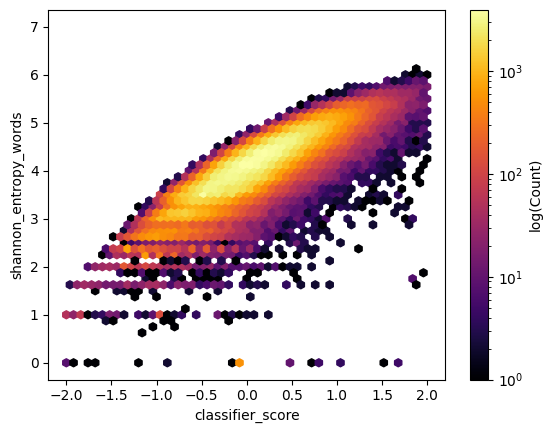

In [10]:
print("------------- Simple Wikipedia -----------------------------------------------------------")
x = sw_dataset[x_label]
y = sw_dataset[y_label]

plt.hexbin(x, y, gridsize=50, cmap='inferno', bins='log', extent=(-2, 2, 0, 7))
plt.colorbar(label='log(Count)')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

------------- OneStopEnglish -----------------------------------------------------------


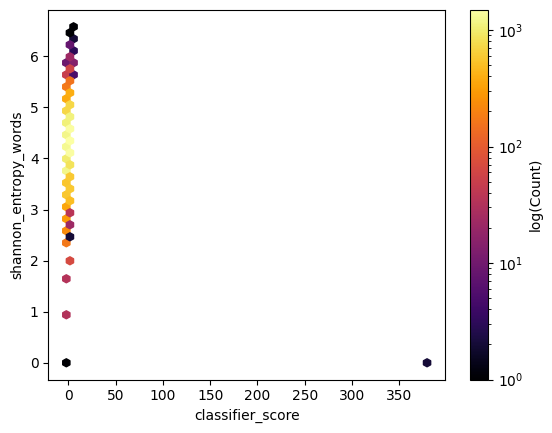

In [11]:
print("------------- OneStopEnglish -----------------------------------------------------------")
x = ose_dataset[x_label]
y = ose_dataset[y_label]

plt.hexbin(x, y, gridsize=50, cmap='inferno', bins='log')
plt.colorbar(label='log(Count)')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

In [12]:
# # Plot concrete datapoints using stratified sampling
# df = dataset.select_columns([x_label, y_label]).to_pandas()
# df["bin"] = pd.cut(df[x_label], bins=50)

# stratified_sample = df.groupby("bin", observed=True).apply(
#     lambda x: x.sample(n=min(len(x), 50), random_state=42),
#     include_groups=False
# ).reset_index(drop=True)

# plt.scatter(stratified_sample[x_label], stratified_sample[y_label], alpha=0.5)
# plt.title("Stratified Sample")
# plt.show()

### Filter dataset to only contain examples with valid values

In [13]:
# selected_metrics = ["sentence_length_words", "word_rarity_words", "fre_score_words", "shannon_entropy_words", "ttr_words", "perplexity"]

# define a filter function that determines if a sample is kept (True) or not (False)
# def is_valid(example):
#     for m in selected_metrics:
#         if math.isnan(float(example[m])):
#             return False
#     return True

# sw_clean_dataset = sw_dataset.filter(is_valid)
# ose_clean_dataset = ose_dataset.filter(is_valid)

# print(f"Original size (SimpleWikipedia): {len(sw_dataset)}")
# print(f"Clean size (SimpleWikipedia): {len(sw_clean_dataset)}")

# print(f"Original size (OneStopEnglish): {len(ose_dataset)}")
# print(f"Clean size (OneStopEnglish): {len(ose_clean_dataset)}")

# utils.update_existing_dataset(sw_clean_dataset, f"./results/hf_datasets/{sw_dataset_name}")
# utils.update_existing_dataset(ose_clean_dataset, f"./results/hf_datasets/{ose_dataset_name}")

### Difficulty Classifier Evaluation

Overall Accuracy: 0.5929


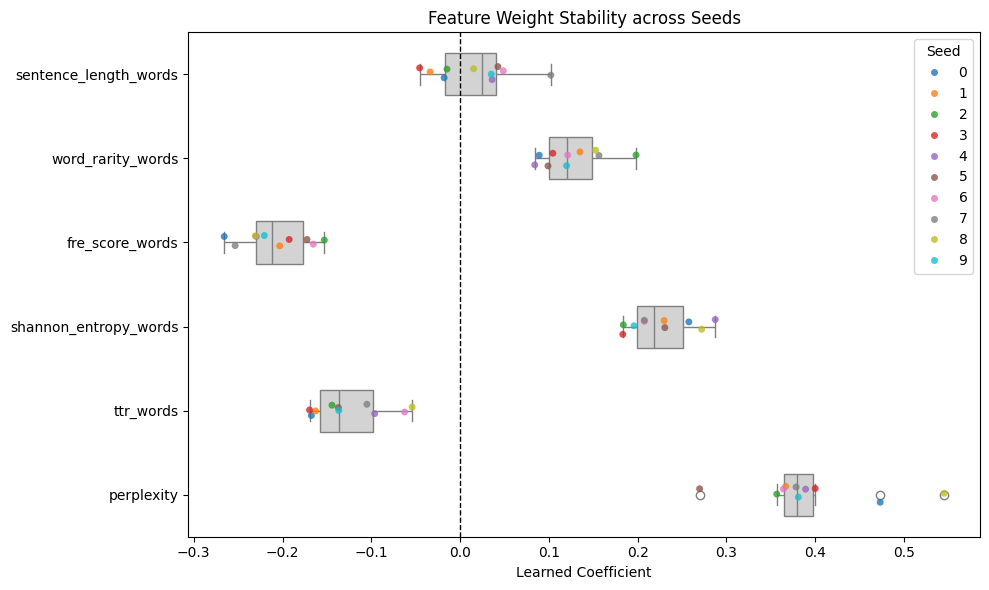

In [14]:
EXPERIMENT_DIR = f"./results/difficulty_classifier_normalized_input"
# Load the data
with open(f"{EXPERIMENT_DIR}/log.json", 'r') as f:
    data = json.load(f)

print(f"Overall Accuracy: {data['aggregates']['mean_accuracy']:.4f}")

feature_names = data["config"]["selected_metrics"]

# convert to long format df for plotting
records = []
for run in data['runs']:
    seed = run['seed']
    weights = run['weights']
    
    for name, weight in zip(feature_names, weights):
        records.append({
            "Seed": str(seed),
            "Feature": name,
            "Weight": weight
        })

df = pd.DataFrame(records)


plt.figure(figsize=(10, 6))
# boxplot
sns.boxplot(
    data=df, 
    x="Weight", 
    y="Feature", 
    color="lightgray",
    showfliers=True,
    width=0.5
)

# overlap strip plot
sns.stripplot(
    data=df, 
    x="Weight", 
    y="Feature", 
    hue="Seed",
    # color="red", 
    size=5, 
    jitter=0.1, 
    alpha=0.8
)


plt.axvline(0, color='black', linestyle='--', linewidth=1) # The "Zero" line
plt.title("Feature Weight Stability across Seeds")
plt.xlabel("Learned Coefficient")
plt.ylabel("")
plt.tight_layout()

plt.show()

In [15]:
EXPERIMENT_DIR = f"./results/difficulty_classifier_normalized_input"
# Load the data
with open(f"{EXPERIMENT_DIR}/log.json", 'r') as f:
    data = json.load(f)

print(f"Overall Accuracy: {data['aggregates']['mean_accuracy']:.3f} +/- {data['aggregates']['std_accuracy']:.3f}")
print(f"Overall F1: {data['aggregates']['mean_f1']:.3f} +/- {data['aggregates']['std_f1']:.3f}")
conv_epoch_list = [run["num_epochs"] for run in data["runs"]]
print(f"Overall num_epochs: {np.mean(conv_epoch_list):.3f} +/- {np.std(conv_epoch_list):.3f}")

Overall Accuracy: 0.593 +/- 0.002
Overall F1: 0.551 +/- 0.009
Overall num_epochs: 4.400 +/- 3.105


### Plotting Histograms

------------- Simple Wikipedia -----------------------------------------------------------


100%|██████████| 373662/373662 [00:28<00:00, 13222.62it/s]


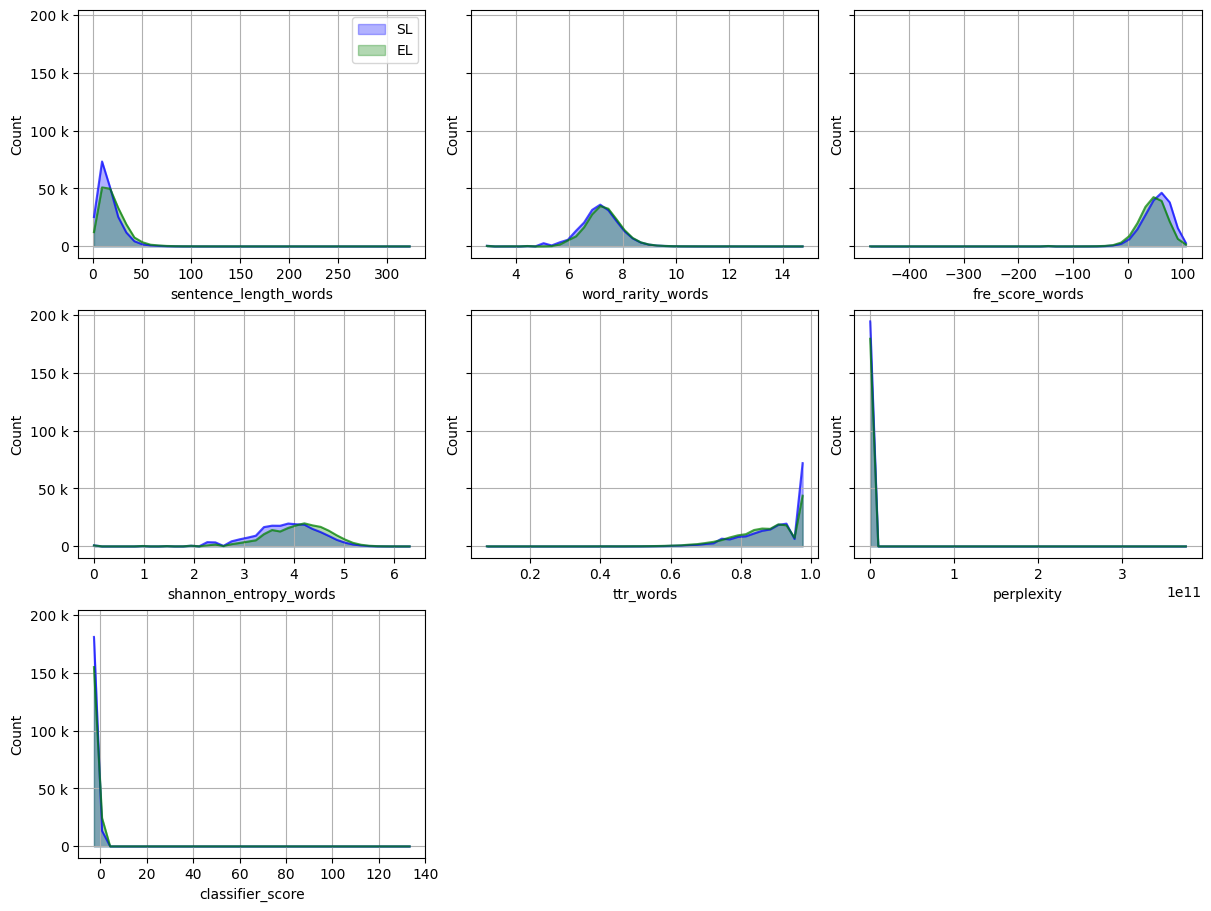

In [ ]:
print("------------- Simple Wikipedia -----------------------------------------------------------")
selected_metrics = ["sentence_length_words", "word_rarity_words", "fre_score_words", "shannon_entropy_words", "ttr_words", "perplexity", "classifier_score"]
# eval_dict = utils.compute_histograms(sw_dataset, sw_dataset_name, save_to_disk=True)  # comment out of histograms are already computed and saved to disk
utils.plot_metrics_hist(sw_dataset, sw_dataset_name, selected_metrics)

------------- OneStopEnglish -----------------------------------------------------------


100%|██████████| 18730/18730 [00:01<00:00, 13073.42it/s]


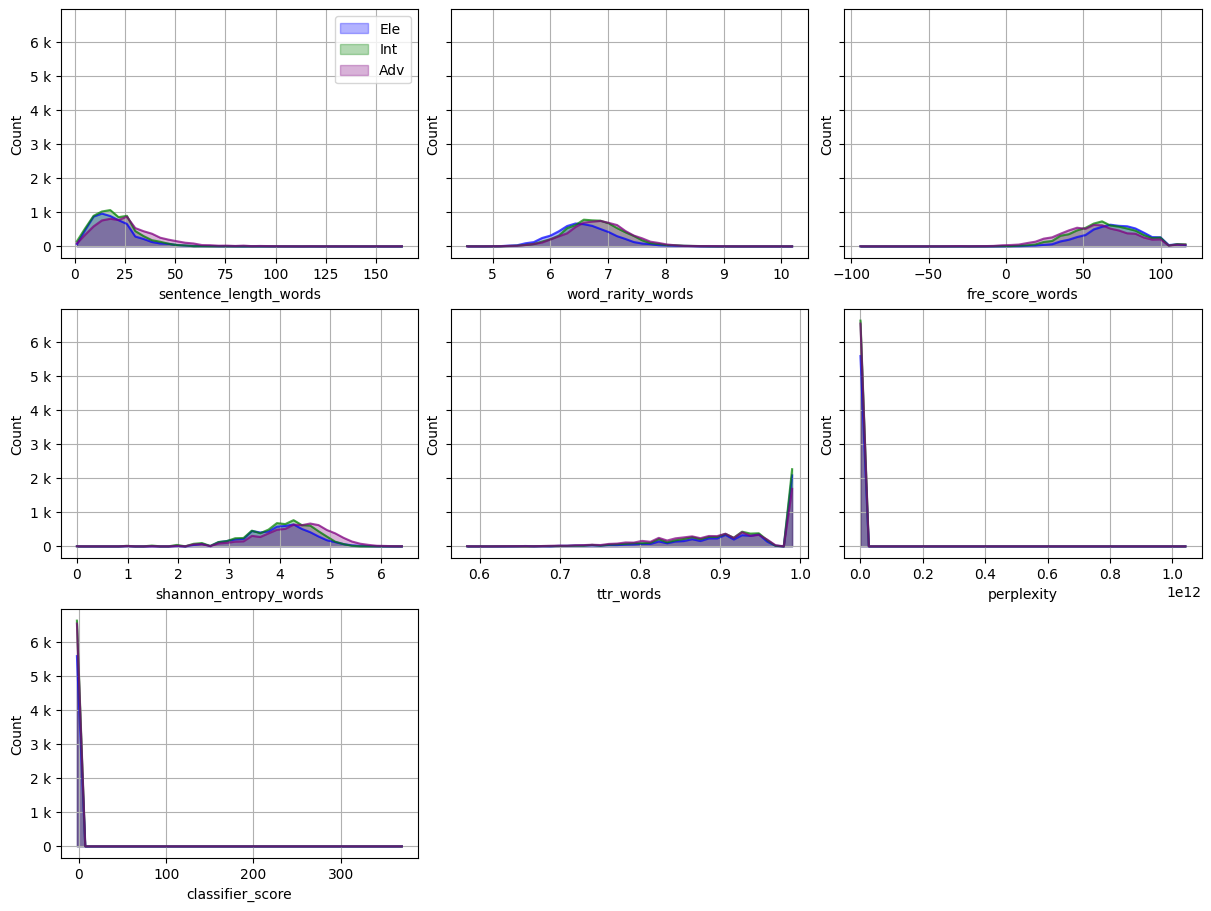

In [ ]:
print("------------- OneStopEnglish -----------------------------------------------------------")
selected_metrics = ["sentence_length_words", "word_rarity_words", "fre_score_words", "shannon_entropy_words", "ttr_words", "perplexity", "classifier_score"]
# eval_dict = utils.compute_histograms(ose_dataset, ose_dataset_name, save_to_disk=True)  # comment out of histograms are already computed and saved to disk
utils.plot_metrics_hist(ose_dataset, ose_dataset_name, selected_metrics)

### Filter outliers

In [20]:
metrics_to_filter = ["sentence_length_words", "word_rarity_words", "fre_score_words", "shannon_entropy_words", "ttr_words", "perplexity", "classifier_score"]

# compute filtering bounds for each metric
def compute_bounds(dataset, metrics_to_filter):
    bounds = {}
    for m in metrics_to_filter:
        col = dataset[m]
        q1, q3 = np.percentile(col, [25, 75])
        iqr = q3 - q1
        bounds[m] = {
            "min": q1 - 1.5 * iqr,
            "max": q3 + 1.5 * iqr
        }
    return bounds

bounds_sw = compute_bounds(sw_dataset, metrics_to_filter)
bounds_ose = compute_bounds(ose_dataset, metrics_to_filter)

# define a filter function that determines if a sample is kept (True) or not (False)
# def filter_dataset(example, bounds):
#     for m in metrics_to_filter:
#         if not (bounds[m]["min"] <= example[m] <= bounds[m]["max"]):
#             return False
        
#     return True


# sw_filtered_dataset = sw_dataset.filter(filter_dataset, fn_kwargs={"bounds":bounds_sw})

# ose_filtered_dataset = ose_dataset.filter(filter_dataset, fn_kwargs={"bounds":bounds_ose})

# print("SimpleWikipedia")
# print(f"Original size: {len(sw_dataset)}")
# print(f"Clean size: {len(sw_filtered_dataset)}")

# print("OneStopEnglish")
# print(f"Original size: {len(ose_dataset)}")
# print(f"Clean size: {len(ose_filtered_dataset)}")

# sw_filtered_dataset.save_to_disk(f"./results/hf_datasets/SimpleWikipedia_filtered")
# ose_filtered_dataset.save_to_disk(f"./results/hf_datasets/OneStopEnglish_filtered")

------------- Simple Wikipedia -----------------------------------------------------------


100%|██████████| 373662/373662 [00:29<00:00, 12818.24it/s]


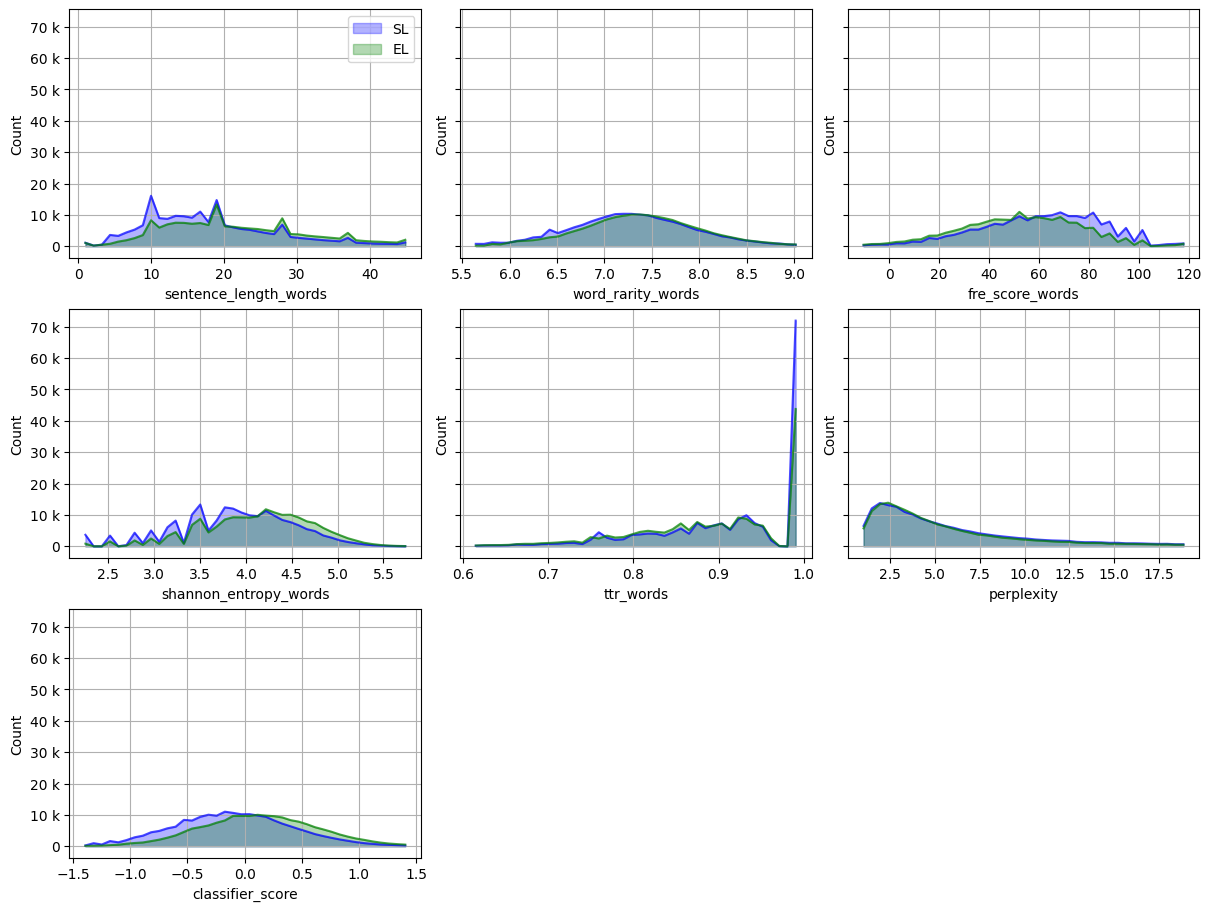

In [ ]:
print("------------- Simple Wikipedia -----------------------------------------------------------")
selected_metrics = ["sentence_length_words", "word_rarity_words", "fre_score_words", "shannon_entropy_words", "ttr_words", "perplexity", "classifier_score"]
# eval_dict = utils.compute_histograms(sw_dataset, sw_dataset_name, save_to_disk=True, bounds=bounds_sw)  # comment out of histograms are already computed and saved to disk
utils.plot_metrics_hist(sw_dataset, sw_dataset_name, selected_metrics, filtered=True)

------------- OneStopEnglish -----------------------------------------------------------


100%|██████████| 18730/18730 [00:01<00:00, 12863.20it/s]


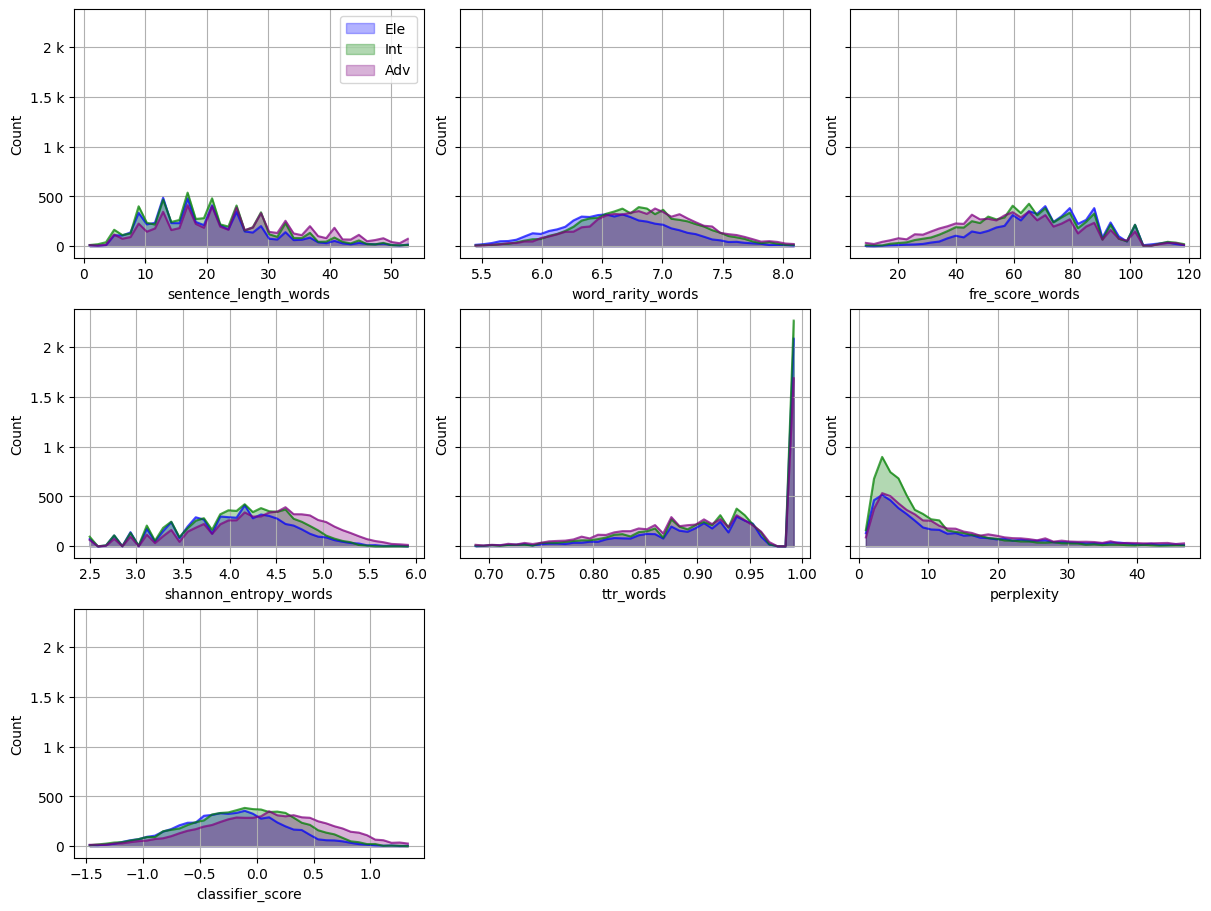

In [ ]:
print("------------- OneStopEnglish -----------------------------------------------------------")
selected_metrics = ["sentence_length_words", "word_rarity_words", "fre_score_words", "shannon_entropy_words", "ttr_words", "perplexity", "classifier_score"]
# eval_dict = utils.compute_histograms(ose_dataset, ose_dataset_name, save_to_disk=True, bounds=bounds_ose)  # comment out of histograms are already computed and saved to disk
utils.plot_metrics_hist(ose_dataset, ose_dataset_name, selected_metrics, filtered=True)

### Figures for presentations/reports

------------- Simple Wikipedia -----------------------------------------------------------


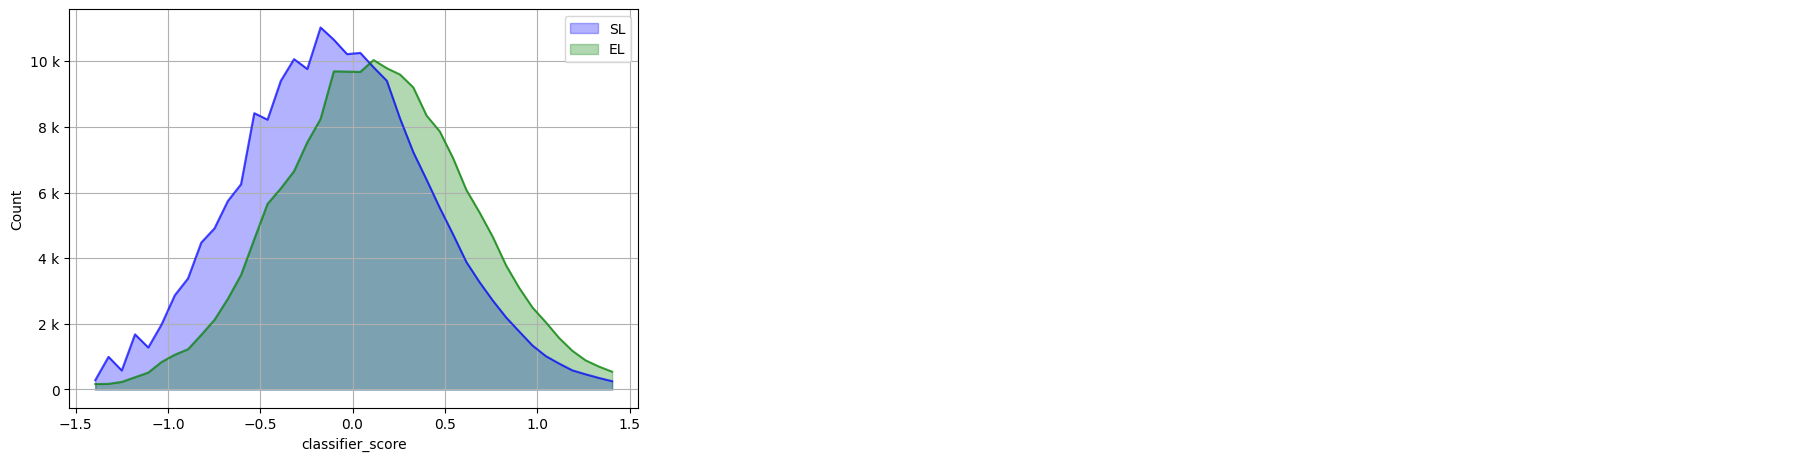

In [23]:
print("------------- Simple Wikipedia -----------------------------------------------------------")
selected_metrics = ["classifier_score"]
# eval_dict = utils.compute_histograms(sw_filtered_dataset_name, save_to_disk=True)  # comment out of histograms are already computed and saved to disk
utils.plot_metrics_hist(sw_dataset, sw_dataset_name, selected_metrics, filtered=True, base_size=(1.5*4, 1.5*3))

------------- OneStopEnglish -----------------------------------------------------------


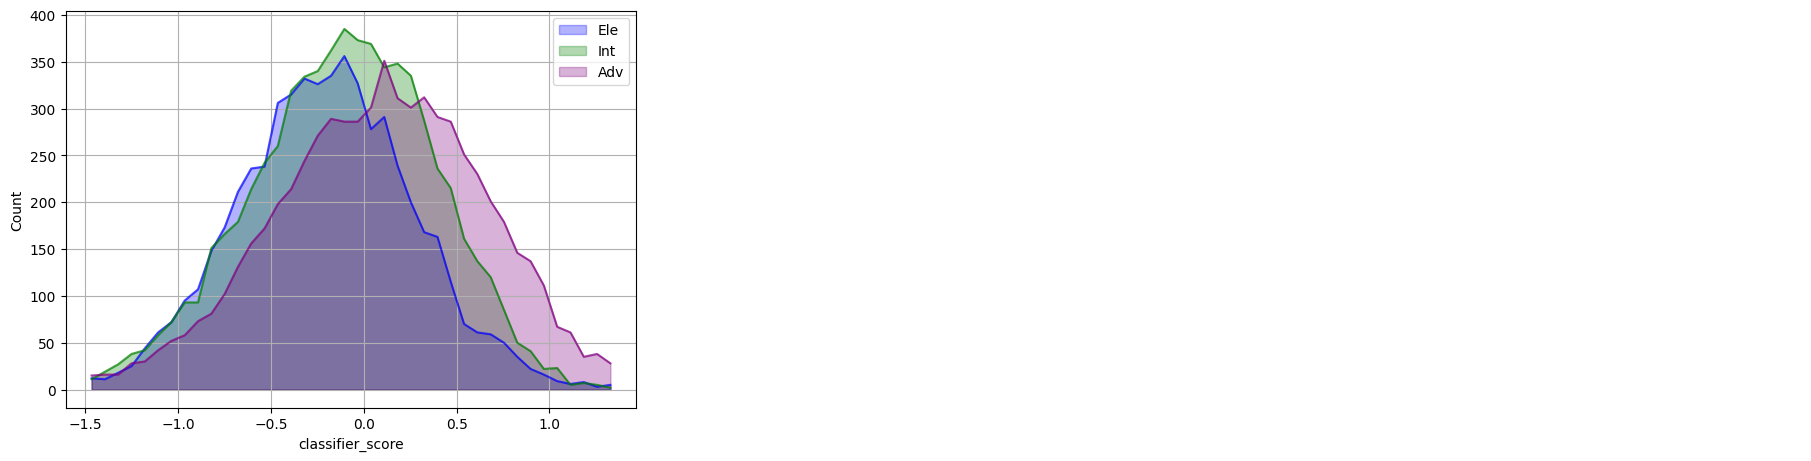

In [24]:
print("------------- OneStopEnglish -----------------------------------------------------------")
selected_metrics = ["classifier_score"]
# eval_dict = utils.compute_histograms(ose_filtered_dataset_name, save_to_disk=True)  # comment out of histograms are already computed and saved to disk
utils.plot_metrics_hist(ose_dataset, ose_dataset_name, selected_metrics, filtered=True, base_size=(1.5*4, 1.5*3))